In [1]:
pos_tag_map = {
    "ABL": "Ablative",
    "ABN": "Adverb",
    "ABX": "Adverb (unspecified)",
    "AP": "Adjective",
    "APg": "Adjective (generic)",
    "AT": "Article",
    "BE": "Verb (to be)",
    "BED": "Past participle of 'to be'",
    "BEDZ": "Third person singular past tense of 'to be'",
    "BEG": "Gerund of 'to be'",
    "BEM": "Present participle of 'to be'",
    "BEN": "Noun (gerund)",
    "BER": "Present participle of 'to be'",
    "BEZ": "Third person singular present tense of 'to be'",
    "CC": "Coordinating conjunction",
    "CD": "Cardinal number",
    "CDg": "Cardinal number (generic)",
    "CS": "Subordinating conjunction",
    "DO": "Auxiliary verb 'do'",
    "DOD": "Past participle of 'to do'",
    "DOZ": "Third person singular present tense of 'to do'",
    "DT": "Determiner",
    "DTI": "Determiner (indefinite)",
    "DTS": "Determiner (specific)",
    "DTX": "Determiner (unknown)",
    "DTg": "Determiner (generic)",
    "EX": "Existential 'there'",
    "HV": "Auxiliary verb 'have'",
    "HVD": "Past participle of 'to have'",
    "HVG": "Gerund of 'to have'",
    "HVN": "Noun (gerund)",
    "HVZ": "Third person singular present tense of 'to have'",
    "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective",
    "JJR": "Comparative adjective",
    "JJS": "Superlative adjective",
    "JJT": "Adjective (temporal)",
    "JJg": "Adjective (generic)",
    "MD": "Modal verb",
    "NEG": "Negation",
    "NIL": "Null",
    "NN": "Noun (singular)",
    "NNS": "Noun (plural)",
    "NNSg": "Noun (plural generic)",
    "NNg": "Noun (singular generic)",
    "NP": "Proper noun (singular)",
    "NPS": "Proper noun (plural)",
    "NPSg": "Proper noun (plural generic)",
    "NPg": "Proper noun (singular generic)",
    "NR": "Noun (reduced)",
    "NRS": "Noun (reduced plural)",
    "NRg": "Noun (reduced generic)",
    "OD": "Ordinal number",
    "PN": "Pronoun",
    "PNg": "Pronoun (generic)",
    "PPL": "Participle",
    "PPLS": "Participle (plural)",
    "PPO": "Personal pronoun (objective)",
    "PPS": "Personal pronoun (subjective)",
    "PPSS": "Personal pronoun (subjective singular)",
    "PPg": "Personal pronoun (generic)",
    "PPgg": "Personal pronoun (generic plural)",
    "QL": "Quantifier",
    "QLP": "Quantifier (postdeterminer)",
    "RB": "Adverb",
    "RBR": "Comparative adverb",
    "RBT": "Temporal adverb",
    "RBg": "Adverb (generic)",
    "RN": "Adverb (reduced)",
    "RP": "Particle",
    "TO": "Infinitive marker",
    "UH": "Interjection",
    "VB": "Verb (base form)",
    "VBD": "Past tense verb",
    "VBG": "Gerund",
    "VBN": "Past participle",
    "VBZ": "Third person singular present tense verb",
    "WDT": "Wh-determiner",
    "WPO": "Wh-pronoun (objective)",
    "WPS": "Wh-pronoun (subjective)",
    "WPg": "Wh-pronoun (generic)",
    "WQL": "Wh-quantifier",
    "WRB": "Wh-adverb",
    "pct": "Percentage"
}
tag_dict = {
    key : 0 for key in pos_tag_map.keys()
}
pos_tag_we_keys = list(pos_tag_map.keys());pos_tag_we_keys.append('<E>')
tag_dict_we = {
    key : 0 for key in pos_tag_we_keys
}

In [2]:
import xml.etree.ElementTree as ET
import numpy as np
import random
import copy
import math

sample_file = ET.parse('brown_tei/Corpus.xml')
root = sample_file.getroot()
tei = root.findall('{http://www.tei-c.org/ns/1.0}TEI')
total_words = 0
states = set({})
sentences = []
for t in tei:
    text = t.find('{http://www.tei-c.org/ns/1.0}text')
    body = text.find('{http://www.tei-c.org/ns/1.0}body')
    for paras in body:
        for sentence in paras:
            if sentence.find('{http://www.tei-c.org/ns/1.0}mw') != None:
                continue
            tags_in_sentence = ['<S>']
            words_in_sentence = ['<S>']
            for word in sentence:
                total_words += 1

                states.add(word.attrib["type"])
                tags_in_sentence.append(word.attrib["type"])
                words_in_sentence.append(word.text)
                # words[word][word.attrib["type"]] += 1
                # print(f'{word.text} --> {pos_tag_map[word.attrib["type"]]}')
            tags_in_sentence.append('<E>')
            words_in_sentence.append('<E>')
            sentences.append({"tags":tags_in_sentence,"words":words_in_sentence})
random.shuffle(sentences)
tr = math.ceil(0.8*len(sentences))
tr_sentences = sentences[:tr]
tst_sentences = sentences[tr:]

print("---- data processed summary ----")
print(f'total samples : {len(tei)}')
print(f'total words   : {total_words}')
print(f'total tags    : {len(states)}')
print(f'total valid sentences : {len(sentences)}')
print(f'training sentence set : {len(tr_sentences)}')
print(f'testing sentence set  : {len(tst_sentences)}')

---- data processed summary ----
total samples : 500
total words   : 1081150
total tags    : 84
total valid sentences : 52686
training sentence set : 42149
testing sentence set  : 10537


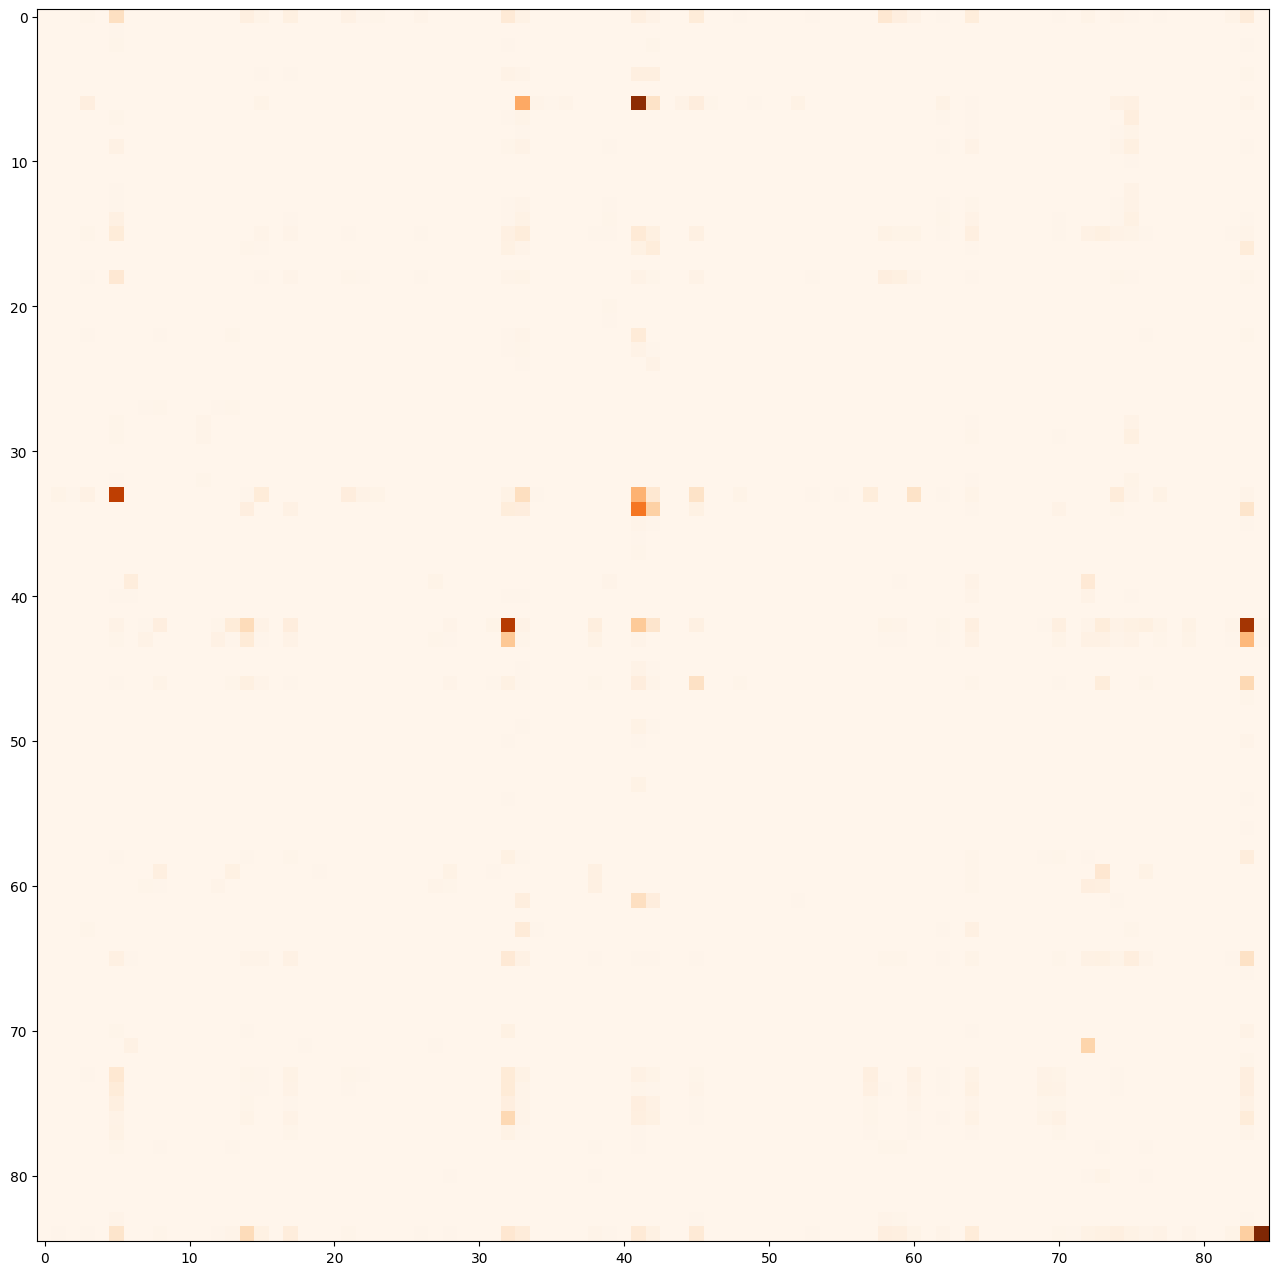

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

emission_count = {'<S>':copy.deepcopy(tag_dict),'<E>':copy.deepcopy(tag_dict)}
transition_count = {'<S>':copy.deepcopy(tag_dict_we)}
for key in pos_tag_map.keys():
    transition_count[key] = copy.deepcopy(tag_dict_we)
for sentence in tr_sentences:
    context = '<S>'
    for i in range(1,len(sentence["words"])):
        w = sentence["words"][i]
        t = sentence["tags"][i]
        transition_count[context][t] += 1
        # print(f'{context} {t} {transition_count[context][t]}')
        context = t
        if w=='<E>':
            continue
        if w not in emission_count:
            emission_count[w] = copy.deepcopy(tag_dict)
        emission_count[w][t] += 1


trans_cnt_arr = [[transition_count[tag][v] for v in transition_count[tag]] for tag in transition_count]
# for r in trans_cnt_arr:
#     print(r)
plt.figure(figsize=(16,16))
plt.imshow(trans_cnt_arr,cmap='Oranges')
arr_tags = ['S'];arr_tags.extend([key for key in pos_tag_map.keys()]);arr_tags.append('<E>')
# for i in arr_tags[:-1]:
#     for j in arr_tags[1:]:
#         chstr = i+j
#         plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
#         plt.text(j,i,transition_count[i][j],ha="center",va="top",color="gray")
